In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
class square():
    def __init__(self, n_rows, n_columns, dimensions = 3):
        self.n_rows = n_rows
        self.n_columns = n_columns
        self.dimensions = dimensions
        self.current_image = np.zeros((self.n_rows,self.n_columns,self.dimensions))
        
    def get_values(self):
        print("Current shape: ", self.current_image.shape)
        return self.current_image
    
    def draw_square(self, save = False):
        fig, ax = plt.subplots(figsize=(15,10))
        plt.imshow(self.current_image)
        if save:
            plt.savefig("cool_fig.jpg")
        plt.show()
    
    def change_cell(self, row, column, color = [1,1,1]):
        self.current_image[row,column] = color
    
    def reshape_square(self, add_row = False, add_column = False,  to_end = True):
        
        if add_row:
            def stack_func(x): 
                return np.vstack(x)
            s_add = np.zeros((1,self.n_columns,self.dimensions))
        if add_column:
            def stack_func(x): 
                return np.hstack(x)
            s_add = np.zeros((self.n_rows,1,self.dimensions))
        
        
        list_of_squares = [s_add, self.current_image]
        if to_end:
            list_of_squares.reverse()
        
        self.current_image = stack_func(list_of_squares)
        self.n_rows, self.n_columns, self.dimension = self.current_image.shape
    
    def add_frame(self):
        self.reshape_square(add_row = True)
        self.reshape_square(add_column = True)
        self.reshape_square(add_row = True, to_end = False)
        self.reshape_square(add_column = True, to_end = False)

In [285]:
def neighbours(elfs_pos, pos, elf_directions):
    pos = np.array(pos)
    nw = pos + np.array([-1,-1])
    n = pos + np.array([-1,0])
    ne = pos + np.array([-1,1])
    e = pos + np.array([0,1])
    se = pos + np.array([1,1])
    s = pos + np.array([1,0])
    sw = pos + np.array([1,-1])
    w = pos + np.array([0,-1])
    
    
    directions_ = {"n":n,"s":s,"w":w,"e":e}
    directions_ = {dir_: directions_[dir_] for dir_ in elf_directions}
        
    for neigh in [nw, n, ne]:
        if tuple(neigh) in elfs_pos:
            del directions_["n"]
            break
            
    for neigh in [sw,s,se]:
        if tuple(neigh) in elfs_pos:
            del directions_["s"]
            break
    
    for neigh in [nw, w, sw]:
        if tuple(neigh) in elfs_pos:
            del directions_["w"]
            break
    
    for neigh in [ne, e, se]:
        if tuple(neigh) in elfs_pos:
            del directions_["e"]
            break
    
    directions_values = list(directions_.values())
    
    if (len(directions_values) == 0) or (len(directions_values) == 4):
        return tuple(pos)
    
    else:
        return tuple(directions_values[0])

In [286]:
input_ = """....#..
..###.#
#...#.#
.#...##
#.###..
##.#.##
.#..#..""".split("\n")

In [269]:
with open("input.txt", "r") as f:
    input_ = f.read().split("\n")[:-1]

In [287]:
elf_pos = []
row_max = 0
column_max = 0
for i, row in enumerate(input_):
    for j, column in enumerate(row):
        if column == "#":
            if i > row_max:
                row_max = i
            if j > column_max:
                column_max = j
            elf_pos.append((i,j))


In [289]:
elf_directions = ["n", "s", "w", "e"]
for i in range(10):
    moves = {}
    elfs_pos = list(elfs.values())

    for elf in elfs.keys():
        pos = elfs[elf]
        new_pos = neighbours(elfs_pos = elfs_pos, pos = pos, elf_directions = elf_directions)
        if new_pos != pos:
            moves[elf] = new_pos

    dub = [k for k, v in Counter(moves.values()).items() if v > 1]

    moves_copy = moves.copy()
    for elf, move in moves_copy.items():
        if move in dub:
            del moves[elf]
    
    for elf, new_pos in moves.items():
        elfs[elf] = new_pos

    dir_ = elf_directions.pop(0)
    elf_directions.append(dir_)

In [264]:
elf_directions = ["n", "s", "w", "e"]

In [265]:
# elfs = {k:{"pos": v, "directions": directions} for k, v in enumerate(elf_pos)}

In [266]:
elfs = {k: v for k, v in enumerate(elf_pos)}

In [267]:
stop = False
i = 0
while stop == False:
    start_dir = i % 4
    moves = {}
    elfs_pos = list(elfs.values())

    for elf in elfs.keys():
        pos = elfs[elf]
        new_pos = neighbours(elfs_pos = elfs_pos, pos = pos, start_dir = start_dir)
        if new_pos != pos:
            moves[elf] = new_pos

    dub = [k for k, v in Counter(moves.values()).items() if v > 1]

    moves_copy = moves.copy()
    for elf, move in moves_copy.items():
        if move in dub:
            del moves[elf]
    
    for elf, new_pos in moves.items():
        elfs[elf] = new_pos
#     dir_ = elf_directions.pop(0)
#     elf_directions.append(dir_)
    
    if len(moves) == 0:
        stop = True
    i += 1
print(i)

KeyboardInterrupt: 

In [220]:

for i in range(10):
    moves = {}
    elfs_pos = [elf["pos"] for elf in elfs.values()]

    for elf in elfs.keys():
        pos = elfs[elf]["pos"]
        move_dir, new_pos = neighbours(elfs_pos = elfs_pos, pos = pos, elf_directions = elf_directions)
        if new_pos != pos:
            moves[elf] = new_pos

    dub = [k for k, v in Counter(moves.values()).items() if v > 1]

    moves_copy = moves.copy()
    for elf, move in moves_copy.items():
        if move in dub:
            del moves[elf]
    
    for elf, new_pos in moves.items():
        elfs[elf]["pos"] = new_pos

    dir_ = elf_directions.pop(0)
    elf_directions.append(dir_)


TypeError: tuple indices must be integers or slices, not str

In [211]:
i

20

In [290]:
elfs_pos = list(elfs.values())
row_min = 0
col_min = 0
row_max = 0
col_max = 0

for row, col in elfs_pos:
    row_min = min(row, row_min)
    row_max = max(row, row_max)
    col_min = min(col, col_min)
    col_max = max(col, col_max)
        
    

In [291]:
((row_max - row_min)+1)*((col_max-col_min)+1)-len(elfs)

7581

In [292]:
s_test = square(20,20)

In [293]:
log = []

for i, (row, column) in enumerate(elfs_pos):
    s_test.change_cell(row + abs(row_min), column + abs(col_min))
    log.append((row + abs(row_min),column + abs(col_min)))

IndexError: index 23 is out of bounds for axis 1 with size 20

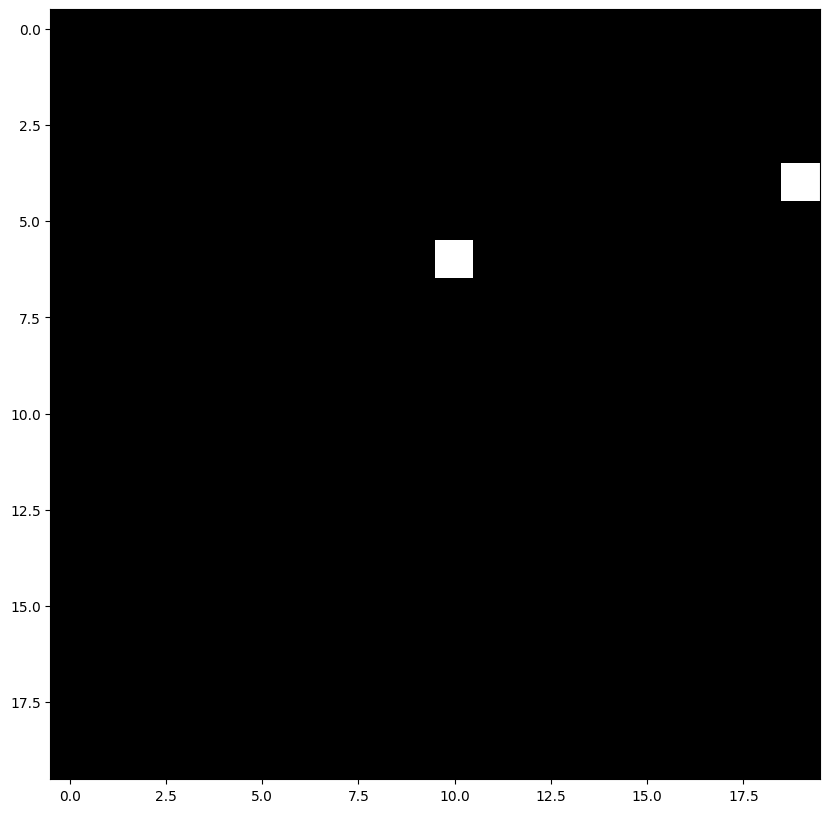

In [294]:
s_test.draw_square()

In [174]:
moves = {}
for elf, elf_pos in elfs.items():
    new_pos = neighbours(elfs.values(), elf_pos)
    if new_pos != elf_pos:
        moves[elf] = new_pos

In [175]:
dub = [k for k, v in Counter(moves.values()).items() if v > 1]

moves_copy = moves.copy()
for elf, move in moves_copy.items():
    if move in dub:
        del moves[elf]

In [177]:
for elf, new_pos in moves.items():
    elfs[elf] = new_pos

In [178]:
elfs

{0: (-1, 4),
 1: (0, 2),
 2: (1, 3),
 3: (1, 5),
 4: (0, 6),
 5: (1, 0),
 6: (2, 4),
 7: (2, 7),
 8: (3, 1),
 9: (3, 5),
 10: (3, 6),
 11: (4, -1),
 12: (4, 2),
 13: (3, 3),
 14: (4, 4),
 15: (5, -1),
 16: (5, 1),
 17: (5, 3),
 18: (5, 5),
 19: (5, 6),
 20: (7, 1),
 21: (7, 4)}

In [45]:
s0.get_values()

Current shape:  (3, 3, 3)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [48]:
s0.reshape_square(add_row = True,add_column = False,  to_end = True)

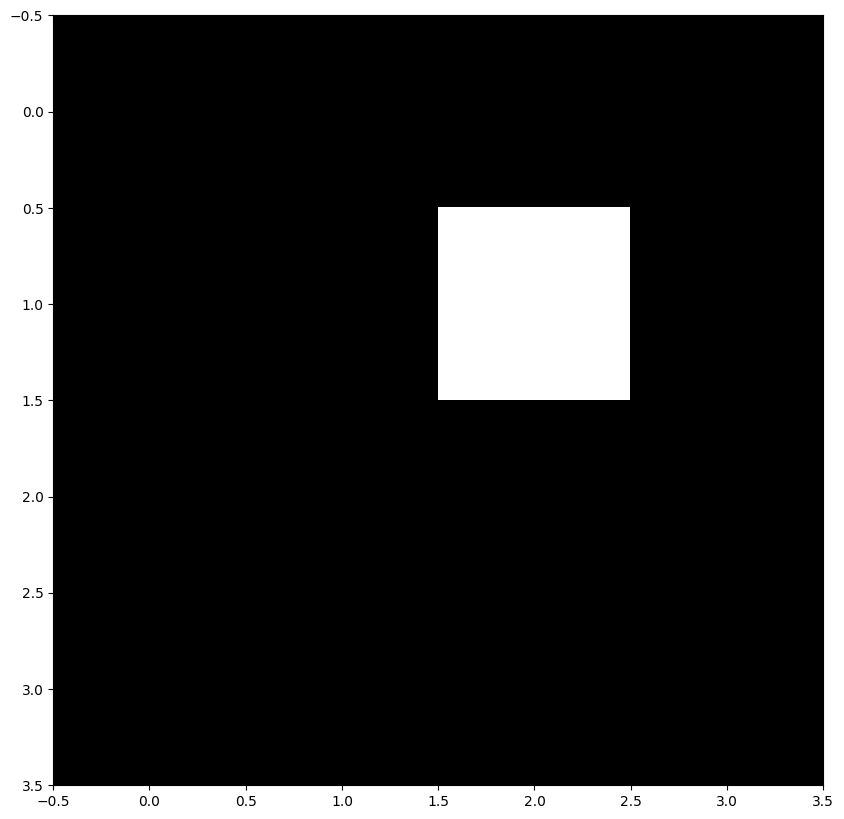

In [49]:
s0.draw_square()

In [51]:
input_

['....#..', '..###.#', '#...#.#', '.#...##', '#.###..', '##.#.##', '.#..#..']

In [57]:
row_max, column_max

(6, 6)

In [55]:
elf_pos

[(0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 0),
 (2, 4),
 (2, 6),
 (3, 1),
 (3, 5),
 (3, 6),
 (4, 0),
 (4, 2),
 (4, 3),
 (4, 4),
 (5, 0),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 4)]